In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("C:\\Users\\sarth\\Downloads\\titanic.csv")

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name            11
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.drop(columns = ["Cabin"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         880 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
df["Name"] = df["Name"].fillna("Unknown")

<AxesSubplot:xlabel='Age'>

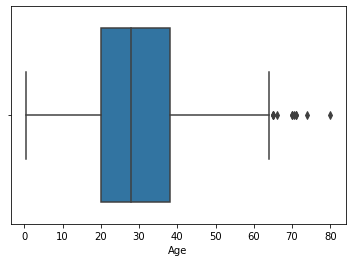

In [14]:
sns.boxplot(x = "Age", data = df)

### Filling the missing values of age with median because there is presence of outliers in age column

In [15]:
df["Age"].median()

28.0

In [16]:
df["Age"] = df["Age"].fillna(df["Age"].median())

### For missing values in embarked we are using mode

In [17]:
df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])

### Missing data count after cleaning

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Sex (Gender analysis of passengers)

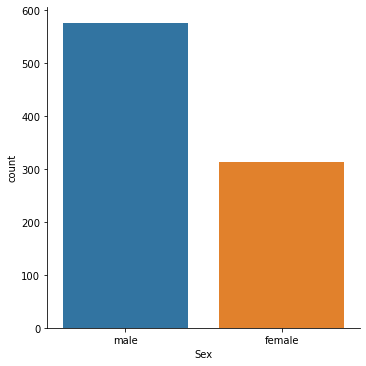

In [22]:
sns.catplot(x="Sex", data=df, kind="count")

### The count of male passengers is greater than the female passengers

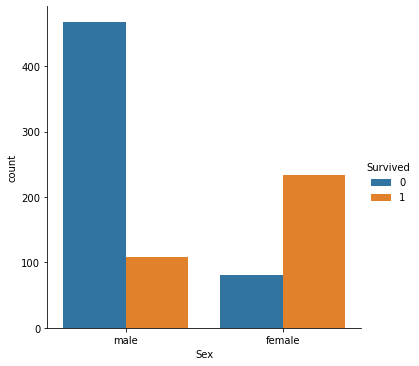

In [23]:
sns.catplot(x="Sex", data=df, kind="count", hue="Survived")

### Conclusion: Compare to females , males death rate is higher

#### Pclass

sns.catplot(x="Pclass", data = df, kind = "count")

### Conclusion : In the ship majority of passengers had third class compartment ticket

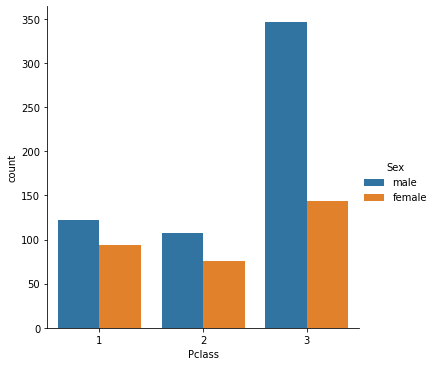

In [27]:
sns.catplot(x="Pclass", data = df, kind = "count", hue = 'Sex')

### Conclusion: There are more no=umber of male passengers in the passenger class 3

In [30]:
def check_age(age):
    if age>16 and age<50:
        return "Adult"
    elif age>50:
        return "Elder"
    elif age<16:
        return "Child"

In [32]:
df["age_type"]=df["Age"].apply(check_age)

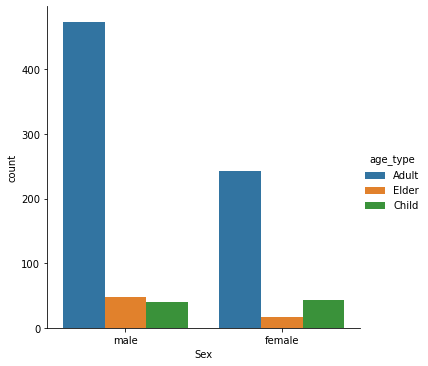

In [40]:
sns.catplot(x = "Sex", data=df, hue="age_type", kind = "count")

### Conlcusio: There are more passegers from age group of 16-50 than childerens and elder

### Embarked

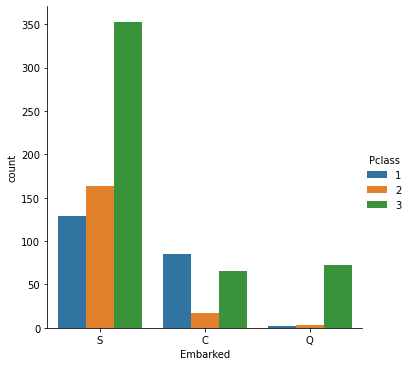

In [41]:
sns.catplot(x = "Embarked", data=df, hue="Pclass", kind = "count")

In [44]:
df["checkFamily"] = df["Parch"]+df["SibSp"]
df["checkFamily"].head()

0    1
1    1
2    0
3    1
4    0
Name: checkFamily, dtype: int64

In [45]:
def checkFam(val):
    if val>0:
        return "With Family"
    else:
        return "Without Family"          

In [50]:
sns.catplot(x = "Pcalss", data=df, hue="Family", kind = "count")

ValueError: Could not interpret input 'Pcalss'

<AxesSubplot:xlabel='Age', ylabel='Count'>

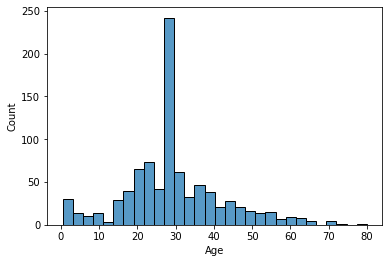

In [53]:
sns.histplot(x="Age", data=df)